In [2]:
#Importa libs utilizadas no projeto

import pandas as pd
import matplotlib.pyplot as plt
from tkinter import Tk
from tkinter.filedialog import askopenfilename
import numpy as np

In [3]:
#Cria interface visual para selecionar o arquivo 'addresses.csv' localizado na pasta data

Tk().withdraw()
file = askopenfilename()


In [175]:
#Cria o dataframe a partir do csv carregado e padroniza os valores None/NaN

df = pd.read_csv(file)
df.style.format(na_rep='Missing')

,Month,"""1958""","""1959""","""1960"""
0,JAN,340,360,417
1,FEB,318,342,391
2,MAR,362,406,419
3,APR,348,396,461
4,MAY,363,420,472
5,JUN,435,472,535
6,JUL,491,548,622
7,AUG,505,559,606
8,SEP,404,463,508
9,OCT,359,407,461


In [176]:
#Cria estrutura de dados adequada para utilizar na plotagem do gráfico

dictionary = {}
years = list(df.head(0))[1:]
for year in years:
    year_formated = int(year.replace('"', ''))
    dictionary[year_formated] = {}
    for value in df.values:
        dictionary[year_formated][value[0]] = [value[1], value[2], value[3]]
print(dictionary)

{1958: {'JAN': [340, 360, 417], 'FEB': [318, 342, 391], 'MAR': [362, 406, 419], 'APR': [348, 396, 461], 'MAY': [363, 420, 472], 'JUN': [435, 472, 535], 'JUL': [491, 548, 622], 'AUG': [505, 559, 606], 'SEP': [404, 463, 508], 'OCT': [359, 407, 461], 'NOV': [310, 362, 390], 'DEC': [337, 405, 432]}, 1959: {'JAN': [340, 360, 417], 'FEB': [318, 342, 391], 'MAR': [362, 406, 419], 'APR': [348, 396, 461], 'MAY': [363, 420, 472], 'JUN': [435, 472, 535], 'JUL': [491, 548, 622], 'AUG': [505, 559, 606], 'SEP': [404, 463, 508], 'OCT': [359, 407, 461], 'NOV': [310, 362, 390], 'DEC': [337, 405, 432]}, 1960: {'JAN': [340, 360, 417], 'FEB': [318, 342, 391], 'MAR': [362, 406, 419], 'APR': [348, 396, 461], 'MAY': [363, 420, 472], 'JUN': [435, 472, 535], 'JUL': [491, 548, 622], 'AUG': [505, 559, 606], 'SEP': [404, 463, 508], 'OCT': [359, 407, 461], 'NOV': [310, 362, 390], 'DEC': [337, 405, 432]}}


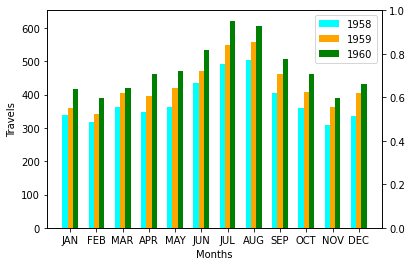

In [178]:
#Cria grafico de barras agrupadas com eixo x compartilhado

legend = list(dictionary.keys())
y = [y for y in dictionary[year_formated].values()]
labels = [label for label in dictionary[year_formated]]
ano1 = []
ano2 = []
ano3 = []
for x in y:
    ano1.append(x[0])
    ano2.append(x[1])
    ano3.append(x[2])

x = np.arange(len(labels))
width = 0.2
plt.bar(x-0.2, ano1, width, color='cyan')
plt.bar(x, ano2, width, color='orange')
plt.bar(x+0.2, ano3, width, color='green')

plt.xticks(x, labels)
plt.xlabel("Months")
plt.ylabel("Travels")
plt.legend(legend)
plt.twinx()
plt.show()



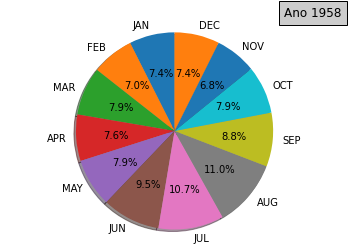

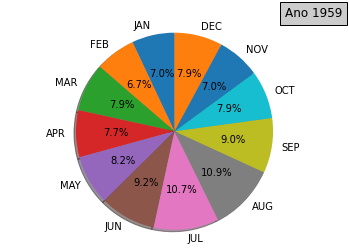

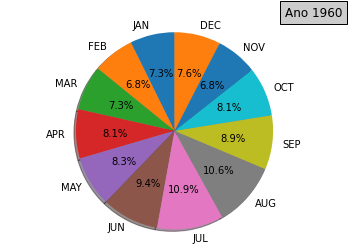

In [179]:
#Cria gráfico de pizza para os três anos

years = {
        'ano1': ano1,
        'ano2': ano2,
        'ano3': ano3
}
for counter, year in enumerate(legend, start=1):
        
        labels = [label for label in dictionary[year_formated]]
        sizes = years[f'ano{counter}']

        fig1, ax1 = plt.subplots()
        ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
                shadow=True, startangle=90)
        ax1.axis('equal')
        plt.title(f"Ano {year}", loc='right', bbox={'facecolor':'0.8', 'pad':5})

        plt.show()
        

   JAN  Year
0  340  1958
1  360  1959
2  417  1960


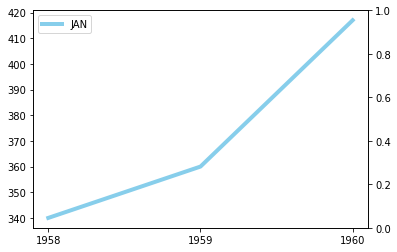

   FEB  Year
0  318  1958
1  342  1959
2  391  1960


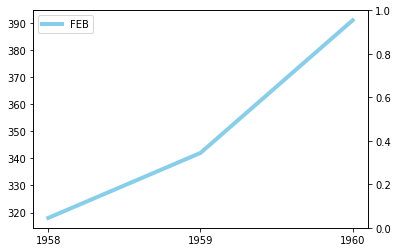

   MAR  Year
0  362  1958
1  406  1959
2  419  1960


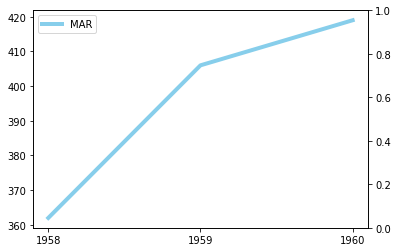

   APR  Year
0  348  1958
1  396  1959
2  461  1960


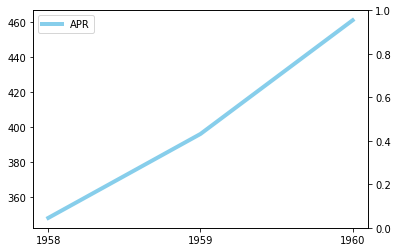

   MAY  Year
0  363  1958
1  420  1959
2  472  1960


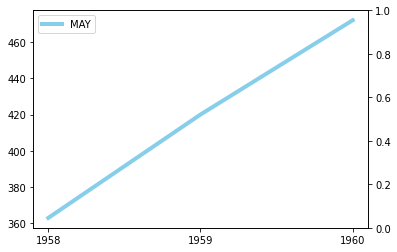

   JUN  Year
0  435  1958
1  472  1959
2  535  1960


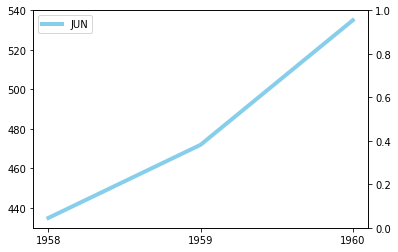

   JUL  Year
0  491  1958
1  548  1959
2  622  1960


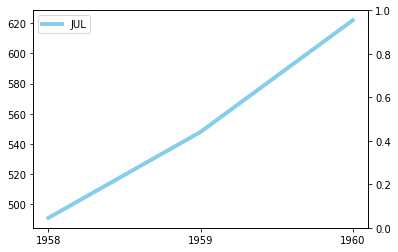

   AUG  Year
0  505  1958
1  559  1959
2  606  1960


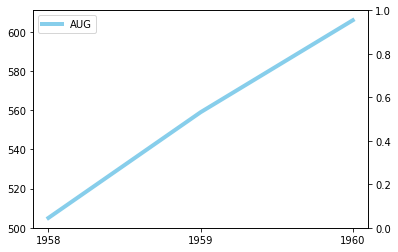

   SEP  Year
0  404  1958
1  463  1959
2  508  1960


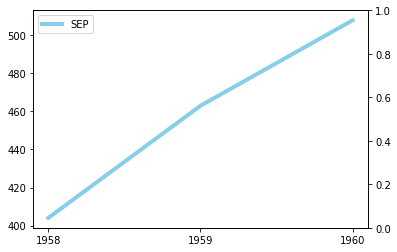

   OCT  Year
0  359  1958
1  407  1959
2  461  1960


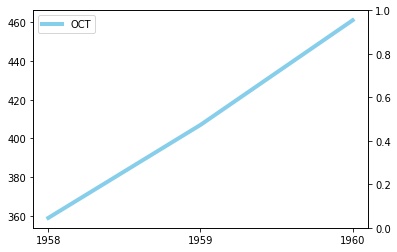

   NOV  Year
0  310  1958
1  362  1959
2  390  1960


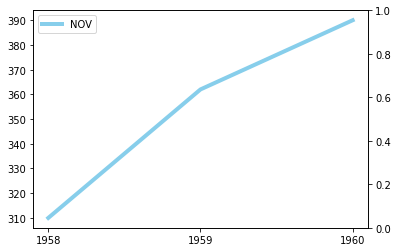

   DEC  Year
0  337  1958
1  405  1959
2  432  1960


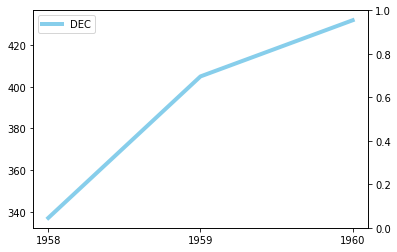

In [180]:
# Cria gráfico de linha para todos os mêses

for index, month in enumerate(labels):
    df=pd.DataFrame({month: y[index], 'Year': [str(l) for l in legend] })
    print(df)
    plt.plot('Year', f'{month}', data=df, markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
    plt.legend()
    plt.twinx() # Compartilha o eixo x
    plt.show()

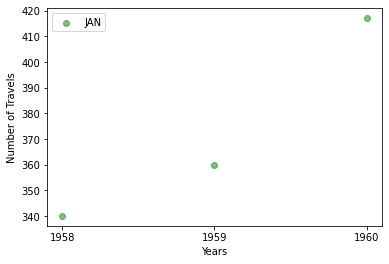

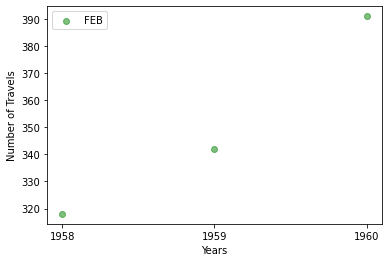

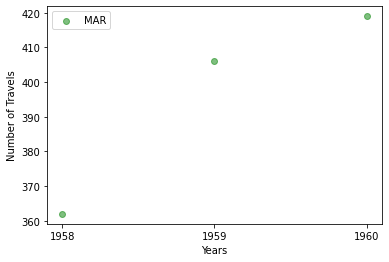

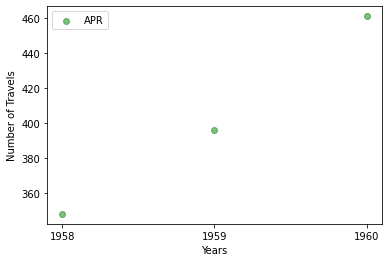

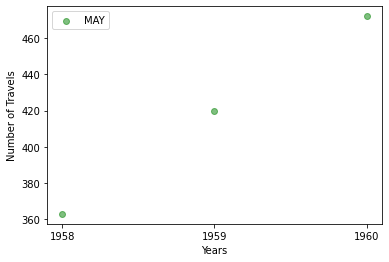

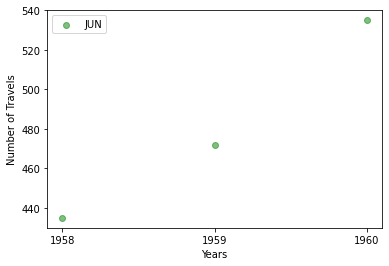

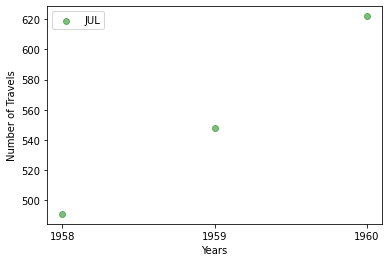

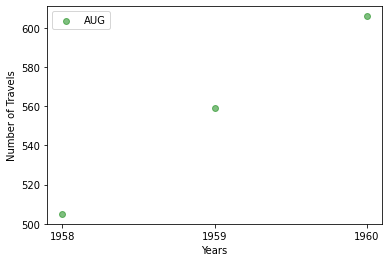

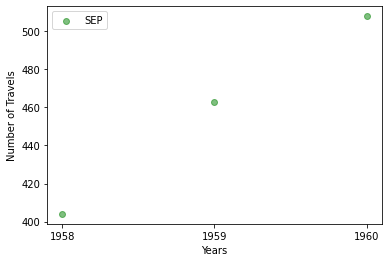

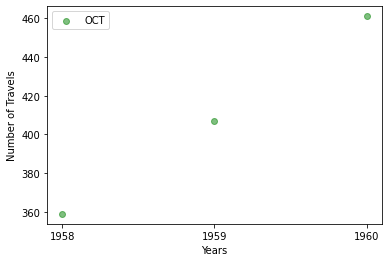

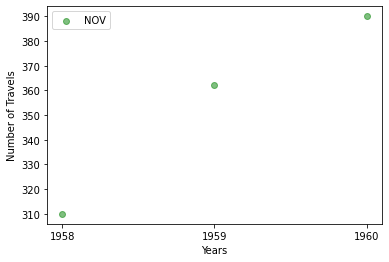

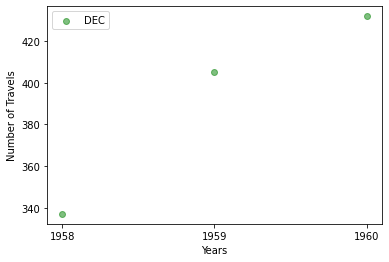

In [199]:
#Cria gráfico de dispersão para todos os mêses

for counter, month in enumerate(labels):
    eixo_y = [str(l) for l in legend]
    eixo_s = y[counter]

    plt.scatter(eixo_y, eixo_s, c="g", alpha=0.5, marker='o',
                label=f"{month}")
    plt.xlabel("Years")
    plt.ylabel("Number of Travels")
    plt.legend(loc='upper left')
    plt.show()